In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [76]:
data = pd.read_csv("META.csv")

In [77]:
# data['Date'] = pd.to_datetime(data['Date'])
# data.set_index('Date', inplace= True)

# Chuẩn hóa dữ liệu 
features = ['Open', 'High', 'Low', 'Volume', 'Close']

scaler = MinMaxScaler()
scaled_data1 = scaler.fit_transform(data[features])

# print(data[features])

In [78]:
n = len(scaled_data1)

train_size = int(n*0.8)

train_data = scaled_data1[:train_size]
test_data = scaled_data1[train_size:]


In [79]:
# Tạo dữ liệu LSTM (60 ngày)
def create_dataset_60 (data, lookback):
    X,y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i - lookback:i])
        y.append(data[i,4])  
    
    return np.array(X), np.array(y)

lookback = 60

X_train1, y_train1 = create_dataset_60(train_data,lookback)
X_test1, y_test1 = create_dataset_60(test_data,lookback)

print(X_train1.shape)
print(X_test1.shape)

(2528, 60, 5)
(587, 60, 5)


In [80]:
model = Sequential ()
model.add(LSTM(units=64, return_sequences=False, input_shape = (60,5)))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')
model.fit(X_train1, y_train1, epochs = 100, batch_size=32)


Epoch 1/100


c:\Users\nhiye\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0022
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 9.2404e-05
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 1.0852e-04
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 8.4170e-05
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 9.0244e-05
Epoch 6/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 9.7910e-05
Epoch 7/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 8.2660e-05
Epoch 8/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 8.4853e-05
Epoch 9/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 6.8797e-05
Epoch 10/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 6.7602e-05
Epoch 11/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 7.2348e-05
Epoch 12/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.4975e-05
Epoch 13/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 6.8418e-05
Epoch 14/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 6.3314e-05
Epoch 15/100
79/7

In [81]:
close_index = 4

predicted = model.predict(X_test1)

#5 thuộc tính nma dự đoán close thôi, nên mấy cột kia phải tạo cột 0 thì mới shape fit được
predicted_full = np.zeros((len(predicted),len(features)))
real_full = np.zeros((len(y_test1), len(features)))

predicted_full[:,close_index] = predicted[:,0]
real_full[:, close_index] = y_test1

predicted_prices_real = scaler.inverse_transform(predicted_full)[:, close_index]
actual_test_prices = scaler.inverse_transform(real_full)[:,close_index]

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


In [1]:
print(predicted_full[4])

NameError: name 'predicted_full' is not defined

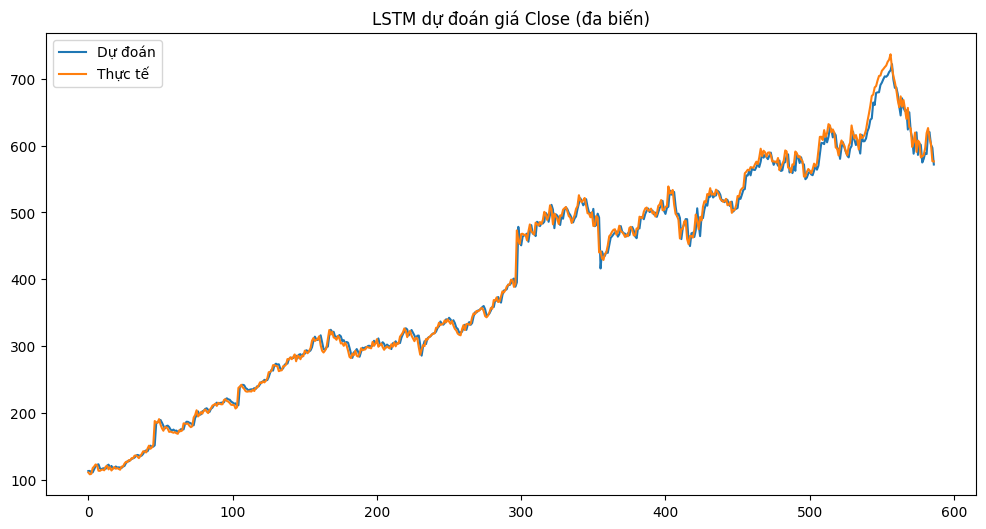

In [82]:
# Vẽ biểu đồ
plt.figure(figsize=(12,6))
plt.plot(predicted_prices_real, label = 'Dự đoán')
plt.plot(actual_test_prices, label = 'Thực tế')
plt.title('LSTM dự đoán giá Close (đa biến)')

plt.legend()
plt.show()

In [83]:
# Đánh giá mô hình
mae = mean_absolute_error(predicted_prices_real, actual_test_prices)
mse = mean_squared_error(predicted_prices_real,actual_test_prices)
rmse = np.sqrt(mse)
r2 = r2_score(predicted_prices_real,actual_test_prices)
mape = np.mean(np.abs(predicted_prices_real - actual_test_prices)/actual_test_prices)*100 


print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"r2_score: {r2:.2f}")
print(f"MAPE: {mape:.4f}%")

MAE: 6.83
MSE: 102.51
RMSE: 10.12
r2_score: 1.00
MAPE: 1.7358%


In [84]:
## DỰ ĐOÁN 7 NGÀY TƯƠNG LAI

In [109]:
sequence_length_new = 60

last_60days = scaled_data1[-sequence_length_new:]

input_seq = last_60days.reshape(1, sequence_length_new, len(features))

In [110]:
future_predictions = []

current_input = input_seq.copy()

for _ in range(7):
    pred = model.predict(current_input)[0][0]  # Dự đoán giá close chuẩn hóa

    # Tạo bản ghi mới với nhiều feature, chỉ gán giá dự đoán vào 'Close'
    new_row = np.zeros((len(features),))
    new_row[close_index] = pred

    # Gắn vào chuỗi thời gian hiện tại
    current_sequence = current_input[0]  # (60, num_features)
    current_sequence = np.vstack([current_sequence[1:], new_row])  # bỏ ngày đầu, thêm ngày mới
    current_input = current_sequence.reshape(1, sequence_length_new, len(features))

    future_predictions.append(pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


In [111]:
# Chuyển predicted (normalized) thành full shape để inverse_transform
future_full = np.zeros((7, len(features)))
for i in range(7):
    future_full[i, close_index] = future_predictions[i]

future_prices_real = scaler.inverse_transform(future_full)[:, close_index]


In [ ]:
from datetime import datetime, timedelta

data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

last_index = data['Date'].last_valid_index()

last_date =  data.loc[last_index, 'Date']

future_dates = [last_date + timedelta(days=i+1) for i in range(7)]

# In kết quả
for date, price in zip(future_dates, future_prices_real):
    print(f"{date.strftime('%Y-%m-%d')}: {price:.2f}")


2025-03-20: 564.81
2025-03-21: 209.00
2025-03-22: 92.81
2025-03-23: 61.65
2025-03-24: 48.13
2025-03-25: 39.62
2025-03-26: 33.15


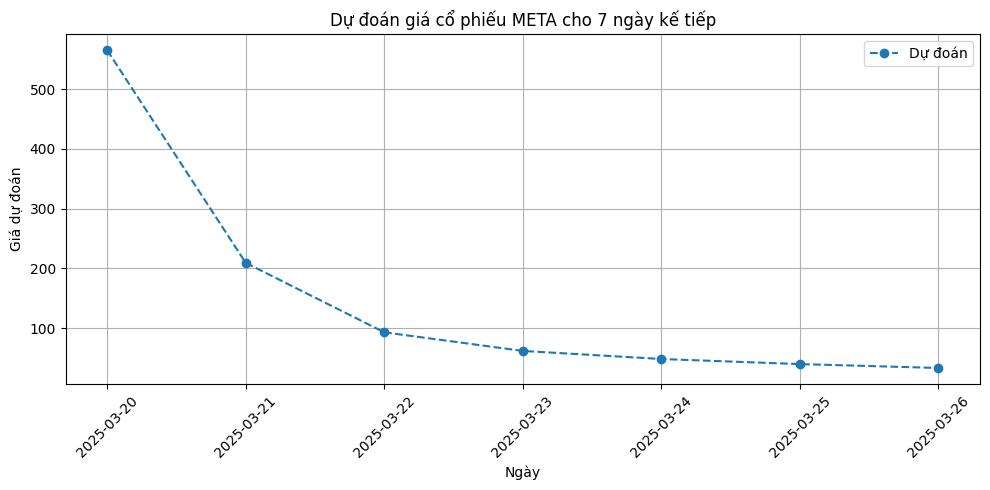

In [121]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(future_dates, future_prices_real, marker='o', linestyle='--', label='Dự đoán')
plt.title('Dự đoán giá cổ phiếu META cho 7 ngày kế tiếp')
plt.xlabel('Ngày')
plt.ylabel('Giá dự đoán')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
